# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# IMPORT FILE

In [2]:
data = pd.read_csv("Salary_Data.csv")

# DATA OVERVIEW

In [3]:
print("Top 5 of data: ")
data.head()

Top 5 of data: 


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
print("Number of rows: {}, number of columns: {}".format(data.shape[0],data.shape[1]))

Number of rows: 30, number of columns: 2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
# View descriptive statistics
print(data.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


The nominal salary ranges between 37731 and 122391

In [7]:
print("Number of duplicated data: {}". format(data.duplicated().sum()))

Number of duplicated data: 0


The data has not duplicated row, so delete some rows will not be needed.

In [8]:
def missing_value(data):    
    for col in data.columns.tolist():          
        print('Missing values percentage of {}: {}%'.format(col, data[col].isnull().sum()/len(data[col])))
missing_value(data)

Missing values percentage of YearsExperience: 0.0%
Missing values percentage of Salary: 0.0%


The data has no missing value, so data imputation will not be needed.

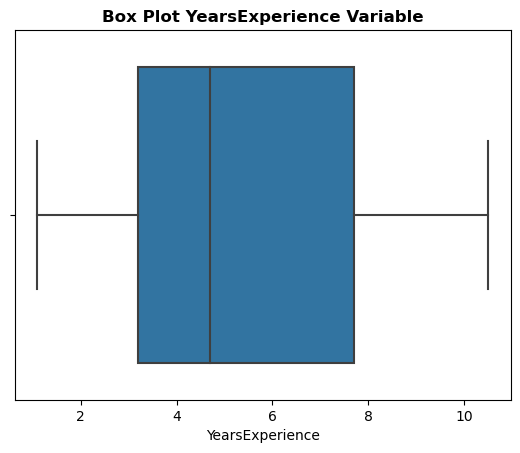

In [9]:
sns.boxplot(x = data['YearsExperience'])
plt.title("Box Plot YearsExperience Variable", weight='bold')
plt.show()

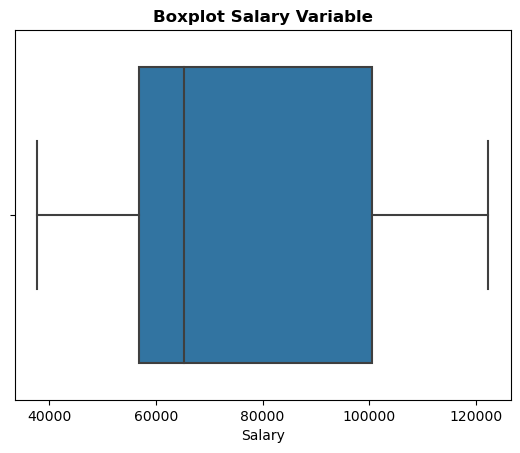

In [10]:
sns.boxplot(x = data['Salary'])
plt.title("Boxplot Salary Variable", weight='bold')
plt.show()

There is no outlier in the dataset, so handling outlier will no be needed.

# Exploratory Data Analysis

C:\Users\Vania\AppData\Local\Temp\ipykernel_4896\1356811597.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Salary'])


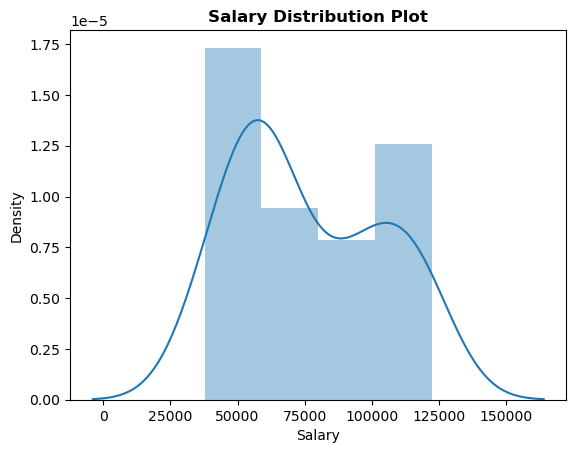

In [11]:
sns.distplot(data['Salary'])
plt.title('Salary Distribution Plot',weight ='bold')
plt.show()

Salary variations mostly congregate around the nominal value of 50,000 and around 100,000

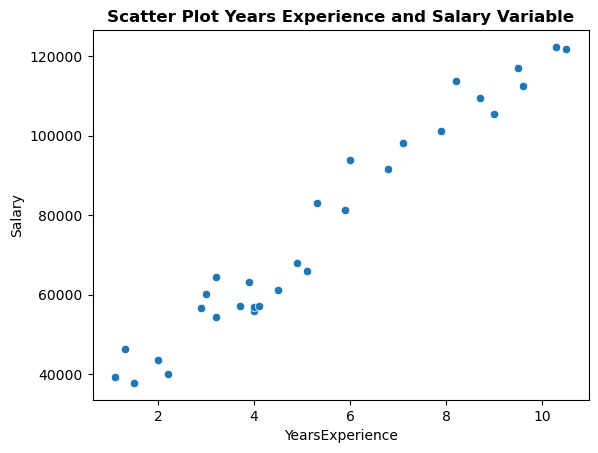

In [12]:
sns.scatterplot(x='YearsExperience', y='Salary', data=data)
plt.title("Scatter Plot Years Experience and Salary Variable", weight='bold')
plt.show()

From the scatterplot, we know that YearsExperience and Salary variables have a positive correlation. As the YearsExperience value increases, the salary value tends to increase

# Assumptions Test of Linear Regression Analysis

In [14]:
# getting dependent and independent variables
X = data.drop(['Salary'], axis = 1)
y = data['Salary']

#import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression

#Call the regressor
reg = LinearRegression()
reg.fit(X, y)

#Apply the regressor
y_pred = reg.predict(X)

A. Check Homoscedicity

1. H0: Error terms are homoscedastic
2. H1: Error terms are heteroscedastic

In [15]:
residuals = y.values-y_pred

In [16]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 1.080730670761194), ('p-value', 0.44327931035663326)]

p-value > 0.05 then H0 accepted. So error terms are homoscedastic

B. Check Normalitiy Residual

C:\Users\Vania\AppData\Local\Temp\ipykernel_4896\2995734267.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


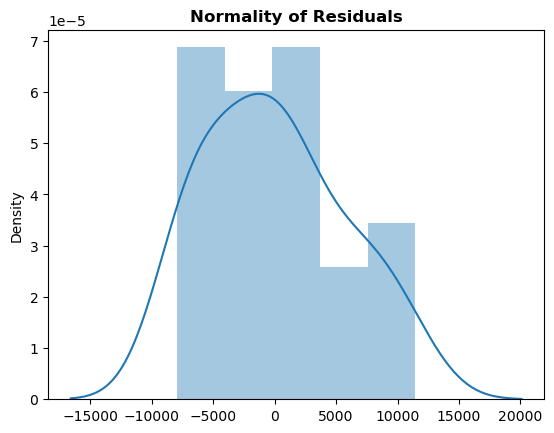

In [17]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of Residuals', weight='bold')

Residuals are normalitity distributed

C. Check Independency Residual (No Autocorrelation)

1. H0: Autocorrelation is absent
2. H1: Autocorrelation is present

In [18]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[5], return_df=True)

,lb_stat,lb_pvalue
5,7.190889,0.206826


p-value > 0.05 then H0 accepted. So Autocorrelation is absent.

From all assumptions test, choosing the regression model to analyze this case is relevant .

# Modelling

In [19]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Call the regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg = reg.fit(X_train, y_train)

# Apply the regressor/model to the test data
y_pred = reg.predict(X_test)

In [20]:
#Linear Regression Slope and Intercept
print("Model intercept, a:" , reg.coef_[0])
print("Model slope, b:" , reg.intercept_) 

Model intercept, a: 9360.261286193652
Model slope, b: 26777.39134119764


# Model Interpretation

From the slope and intercept that we found, we get a model interpretation below

If the value of Years Experience is 0, then the value of Salary is 9360.261286193652 

If the value of Years of Experience increases by one unit, then the value of Salary will increase by 26777.39134119764.

# Model Evaluation

In [21]:
# Calculate and print r2_score
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.9741


R2 Score represents how much the predictor variable can explain the target variable.
We get the information that Year of Experience can explain Salary by 97%. 

In [22]:
# Calculate and print Root Mean Square Error(RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE Value: {:.4f}".format(rmse))

RMSE Value: 4834.2609


# Example of Prediction

In [23]:
#Prediction Data
DataPrediksi=data[['YearsExperience']]
DataPrediksi['Salary_Prediction']=reg.coef_[0]+  reg.intercept_*DataPrediksi['YearsExperience']
DataPrediksi

,YearsExperience,Salary_Prediction
0,1.1,38815.391762
1,1.3,44170.870030
2,1.5,49526.348298
3,2.0,62915.043969
4,2.2,68270.522237
5,2.9,87014.696176
6,3.0,89692.435310
7,3.2,95047.913578
8,3.2,95047.913578
9,3.7,108436.609249
